In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [2]:
df=pd.read_csv('./data/drug_consumption.csv',index_col=0)
df.head()

Age   Gender  Education  Country  Ethnicity   Nscore   Escore  \
ID                                                                      
1   0.49788  0.48246   -0.05921  0.96082    0.12600  0.31287 -0.57545   
2  -0.07854 -0.48246    1.98437  0.96082   -0.31685 -0.67825  1.93886   
3   0.49788 -0.48246   -0.05921  0.96082   -0.31685 -0.46725  0.80523   
4  -0.95197  0.48246    1.16365  0.96082   -0.31685 -0.14882 -0.80615   
5   0.49788  0.48246    1.98437  0.96082   -0.31685  0.73545 -1.63340   

     Oscore   Ascore   Cscore  ...  Ecstasy  Heroin Ketamine Legalh  LSD Meth  \
ID                             ...                                              
1  -0.58331 -0.91699 -0.00665  ...      CL0     CL0      CL0    CL0  CL0  CL0   
2   1.43533  0.76096 -0.14277  ...      CL4     CL0      CL2    CL0  CL2  CL3   
3  -0.84732 -1.62090 -1.01450  ...      CL0     CL0      CL0    CL0  CL0  CL0   
4  -0.01928  0.59042  0.58489  ...      CL0     CL0      CL2    CL0  CL0  CL0   
5  -0.45174 -0.30172  1.30612  ...      CL1     CL0      CL0    CL1  CL0  CL0   

   Mushrooms Nicotine Semer  VSA  
ID                                
1        CL0      CL2   CL0  CL0  
2        CL0      CL4   CL0  CL0  
3        CL1      CL0   CL0  CL0  
4        CL0      CL2   CL0  CL0  
5        CL2      CL2   CL0  CL0  

[5 rows x 31 columns]

In [3]:
cols=['Age','Gender','Education','Country','Ethnicity','Nscore','Escore','Oscore','Ascore','Cscore','Impulsive','SS','Alcohol','Amphet','Amyl','Benzos','Caff','Cannabis','Choc','Coke','Crack','Ecstasy','Heroin','Ketamine','Legalh','LSD','Meth','Mushrooms','Nicotine','Semer','VSA']
categorical_cols=['Alcohol','Amphet','Amyl','Benzos','Caff','Cannabis','Choc','Coke','Crack','Ecstasy','Heroin','Ketamine','Legalh','LSD','Meth','Mushrooms','Nicotine','Semer','VSA']
numerical_cols=['Age','Gender','Education','Country','Ethnicity','Nscore','Escore','Oscore','Ascore','Cscore','Impulsive','SS']
print(len(categorical_cols))
print(len(numerical_cols))

19
12


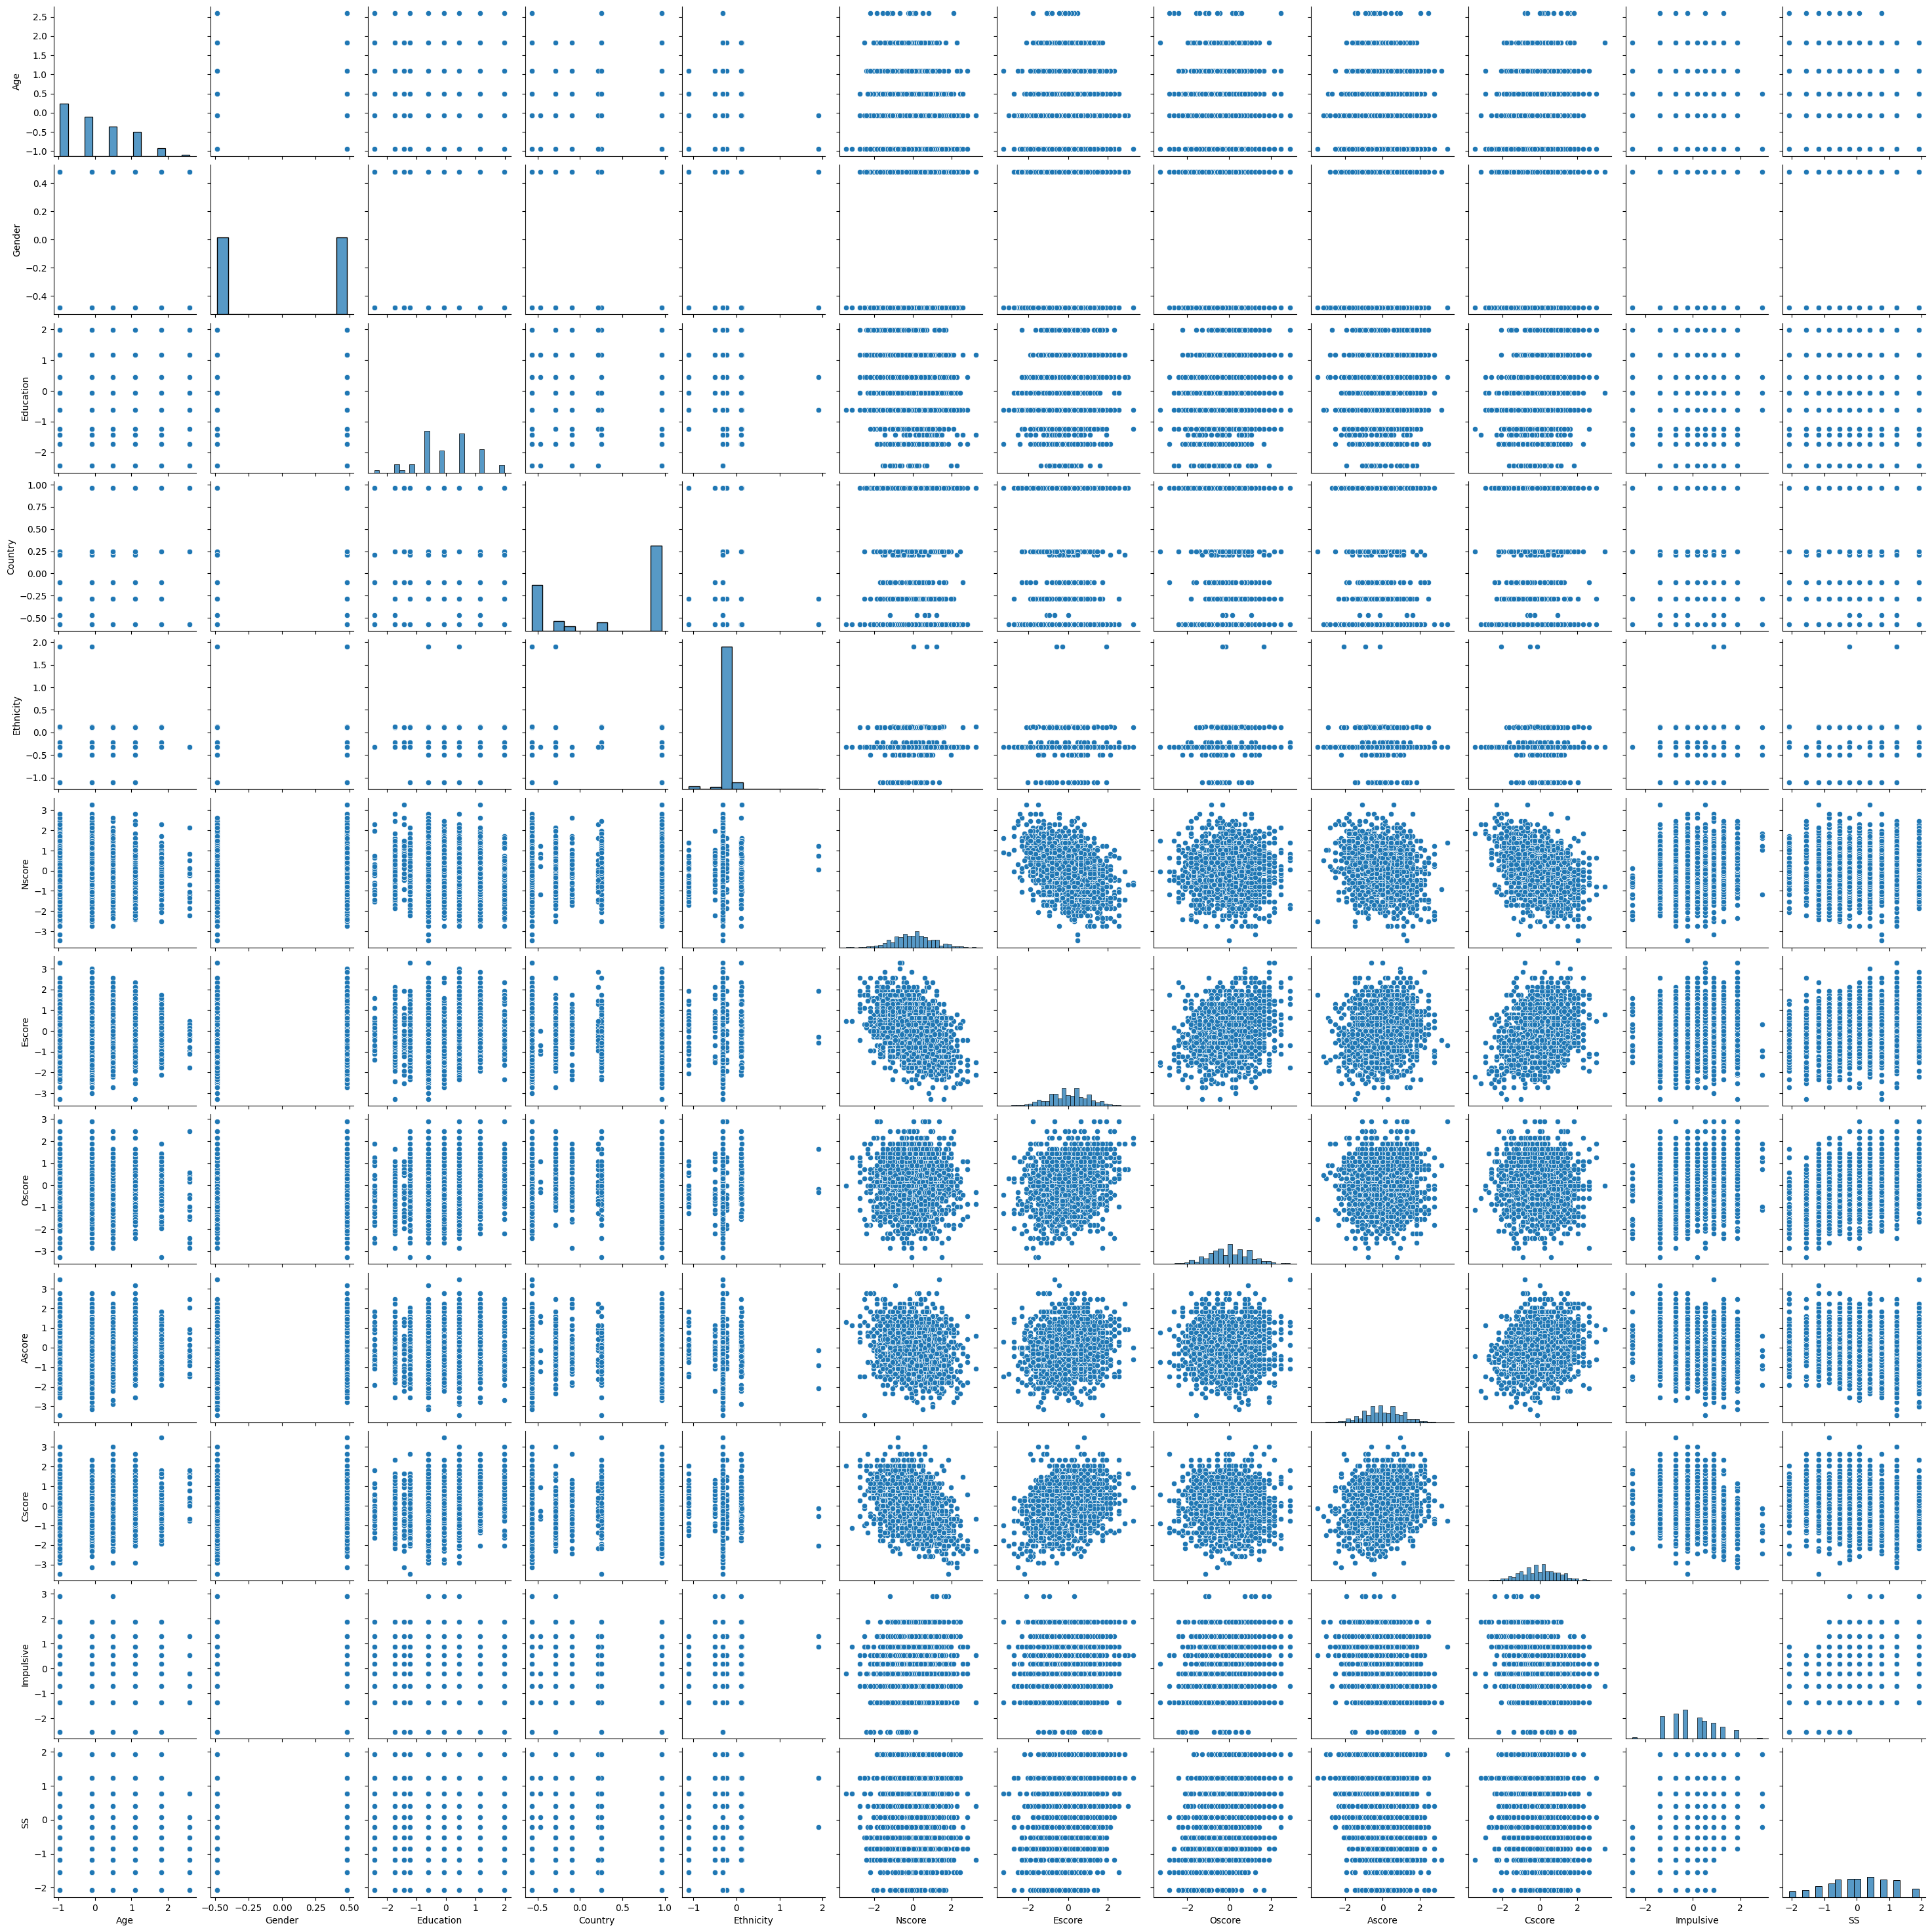

In [4]:
# PAIR PLOTS FOR ALL COLONUMS
sns.pairplot(df)
plt.show()

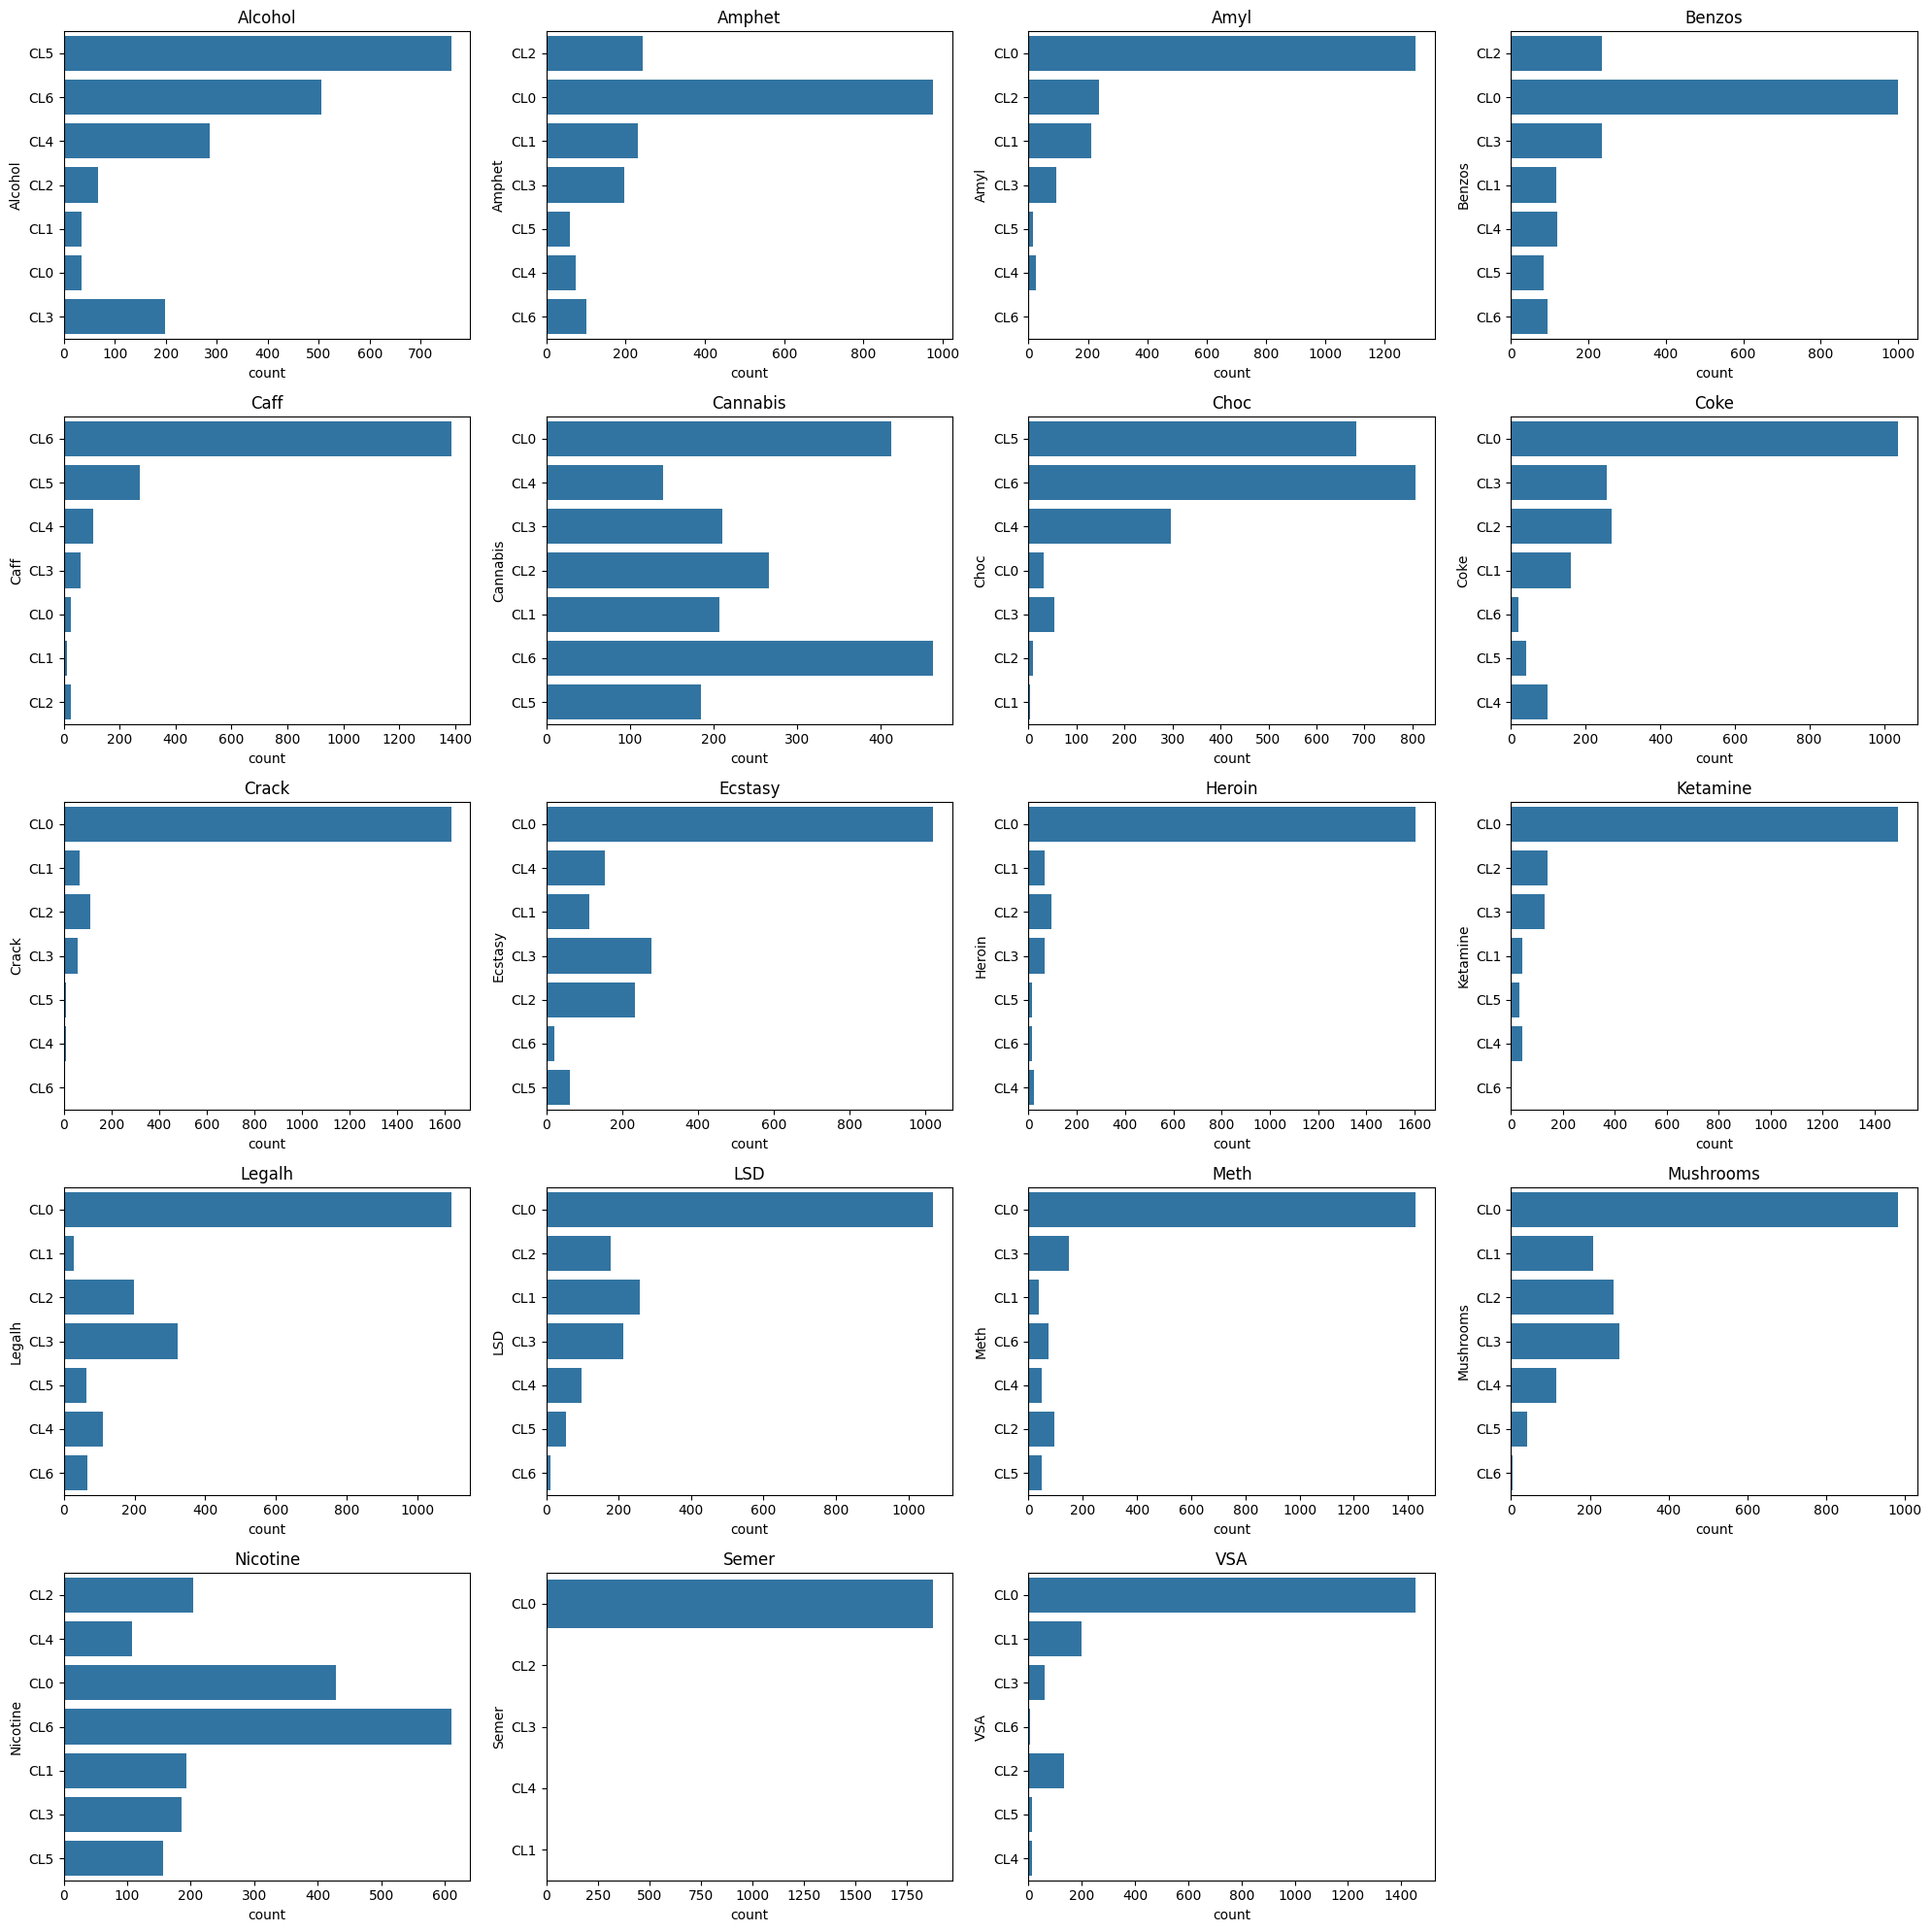

In [5]:
# CATEGROICAL COLUMNS COUNT PLOTS
plt.figure(figsize=(20,20))
for i,col in enumerate(categorical_cols):
    plt.subplot(5,4,i+1)
    sns.countplot(df[col])
    plt.title(col)
    plt.tight_layout()


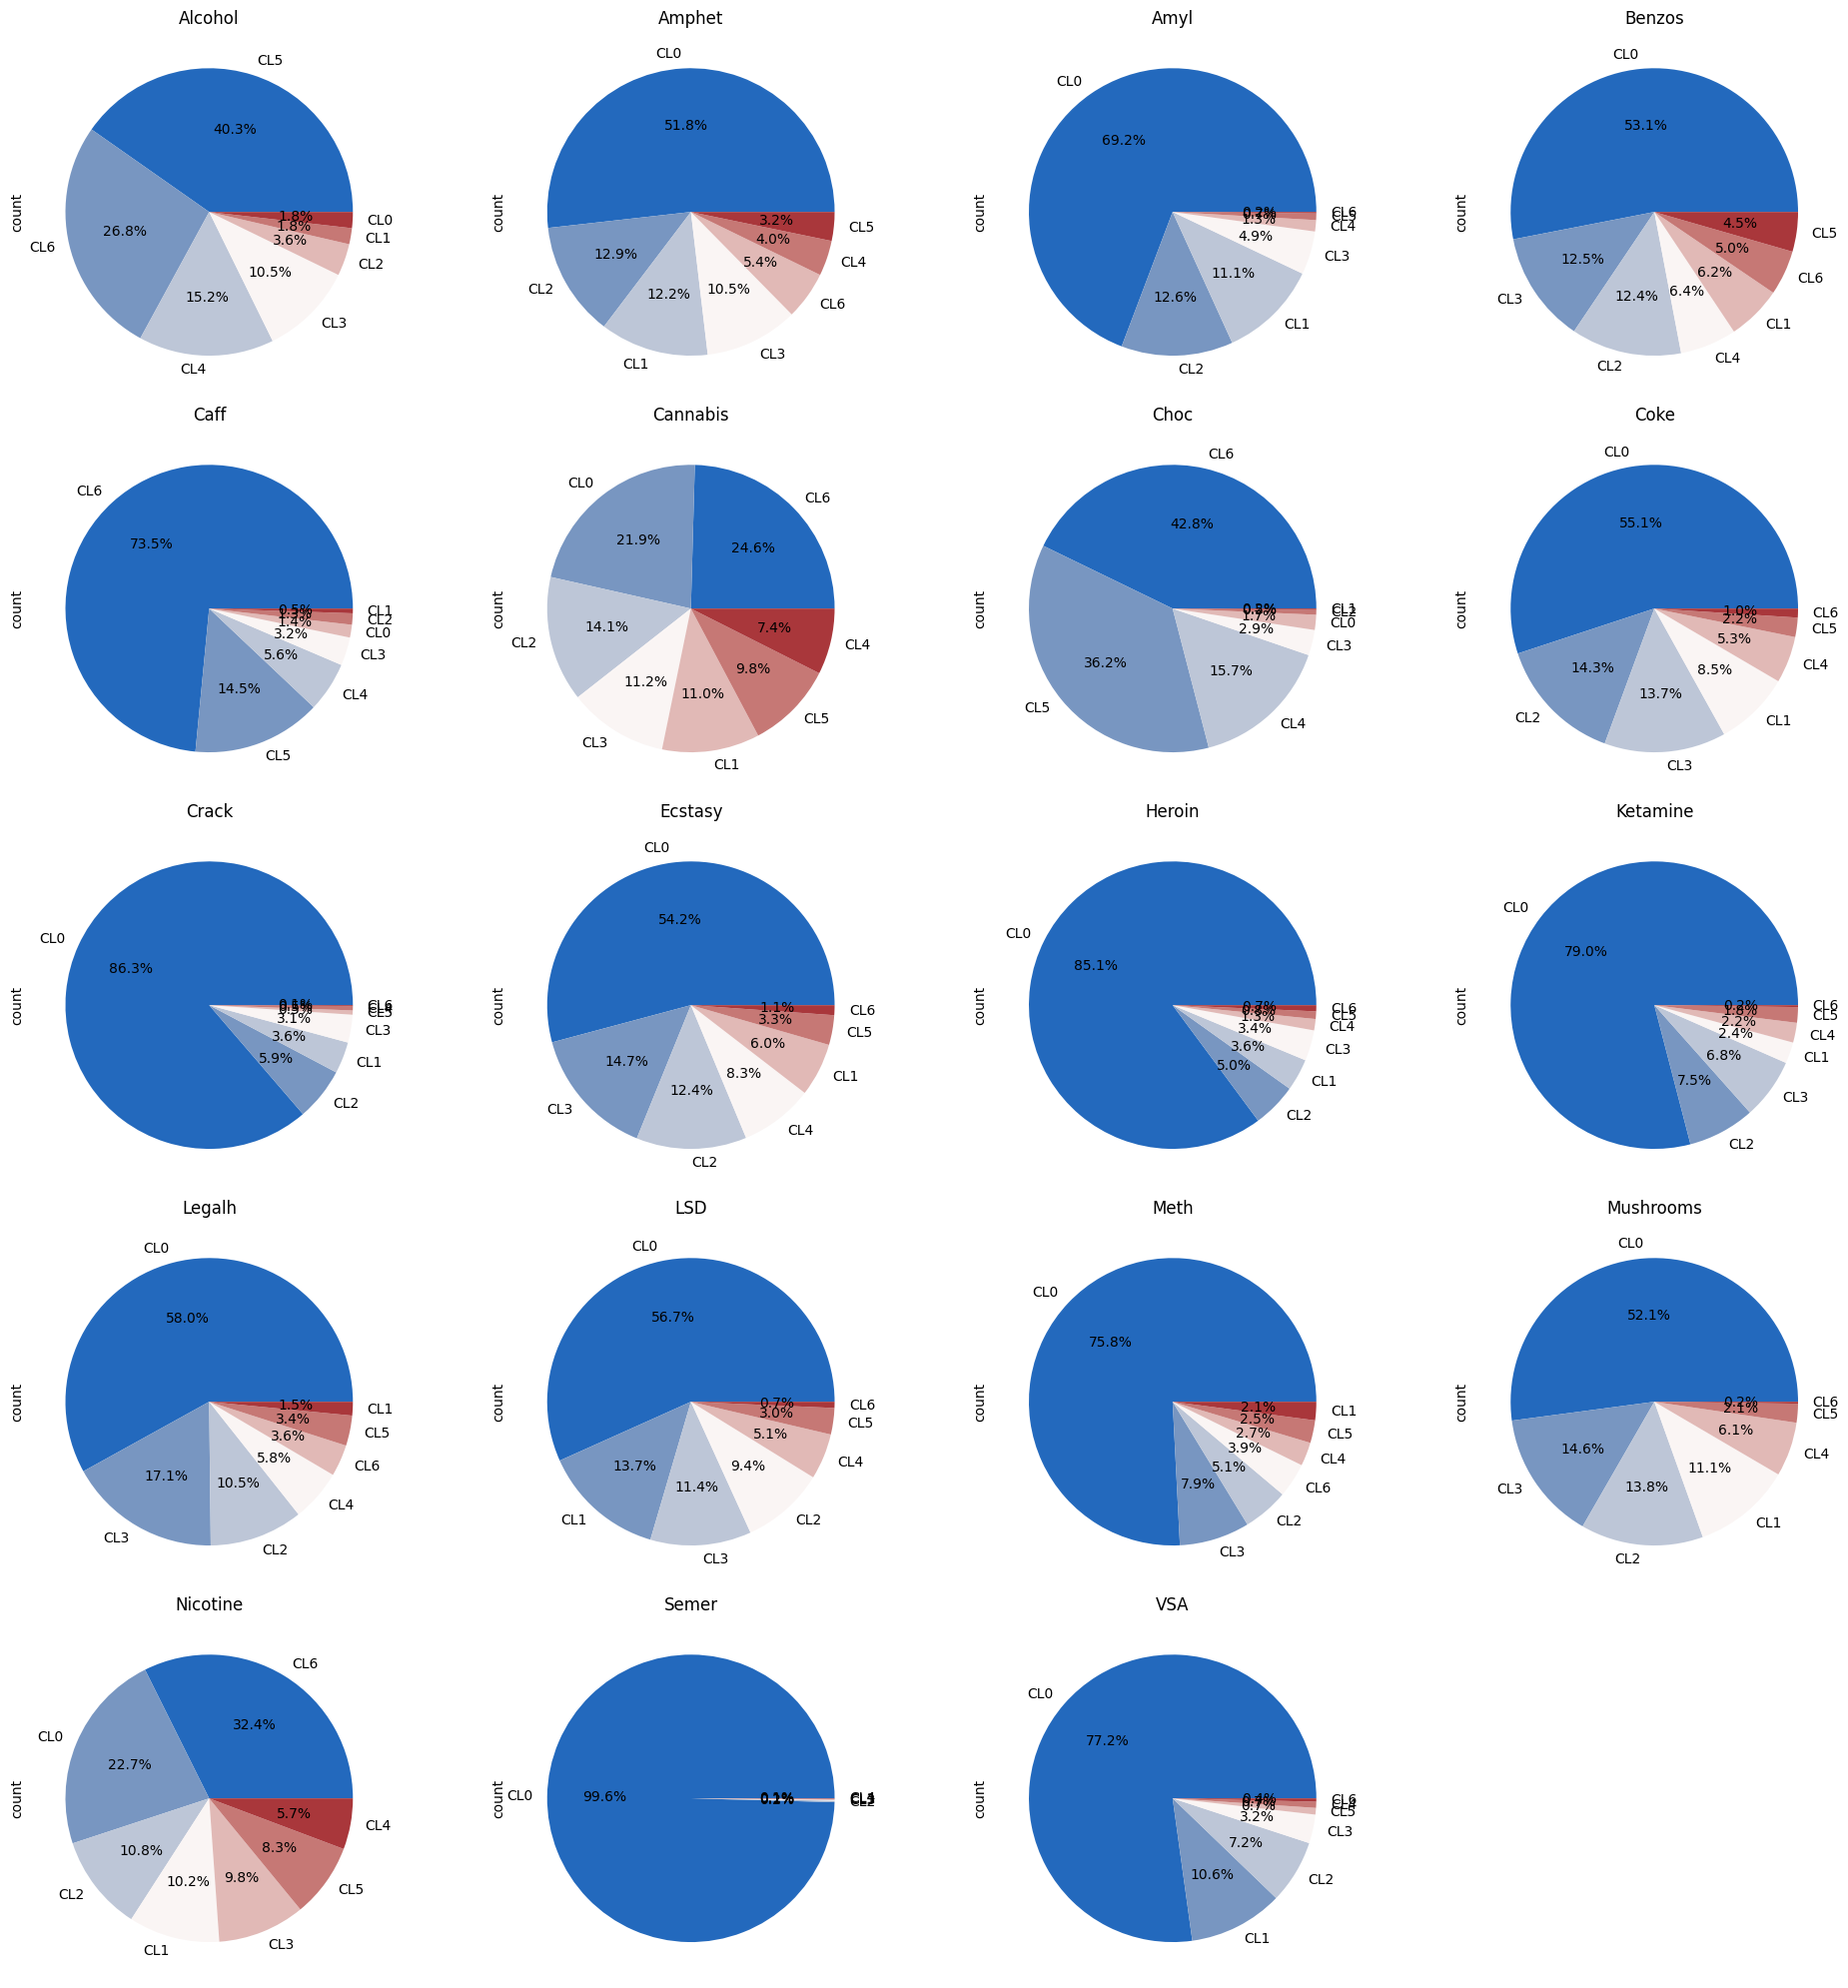

In [6]:
# PIE CHART FOR CATEGORICAL COLUMNS
plt.figure(figsize=(20,20))
for i,col in enumerate(categorical_cols):
    plt.subplot(5,4,i+1)
    df[col].value_counts().plot.pie(autopct='%1.1f%%',cmap='vlag')
    plt.title(col)
    plt.tight_layout()

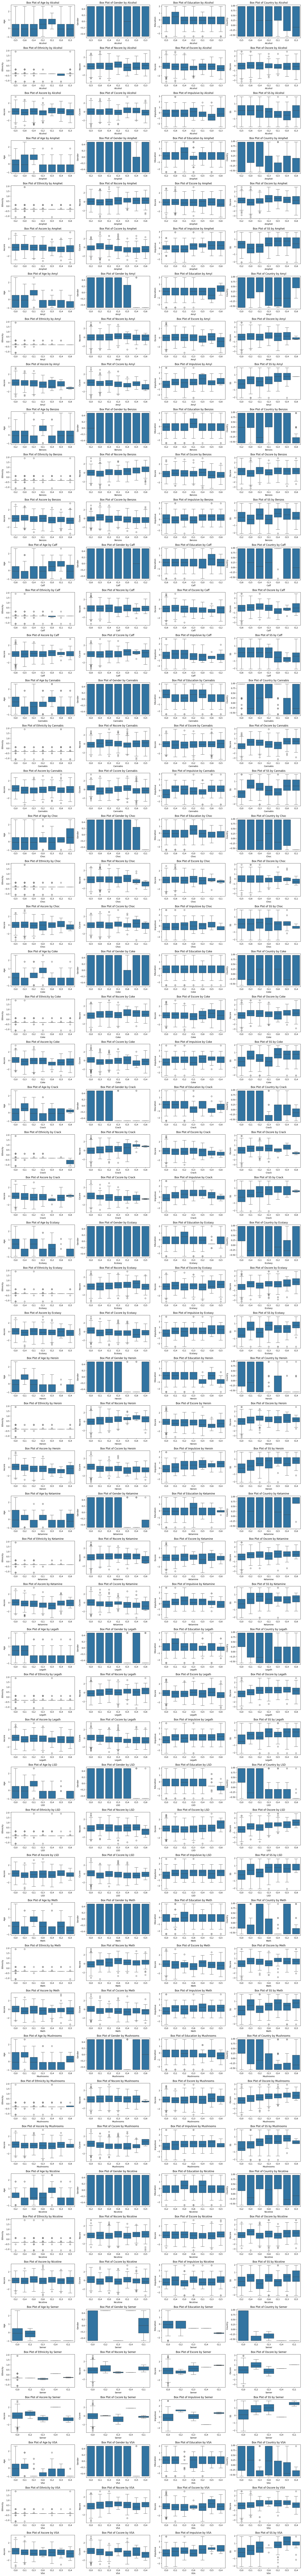

In [7]:
# BOX PLOTS CAT-NUM

rows = 57
fig, axes = plt.subplots(rows,4, figsize=(4 * 5, rows * 3))  
axes = axes.flatten()  

plot_index = 0  
for xx in categorical_cols:
    for yy in numerical_cols:
        sns.boxplot(x=xx, y=yy, data=df, ax=axes[plot_index])
        axes[plot_index].set_title(f'Box Plot of {yy} by {xx}')
        plot_index += 1

plt.tight_layout()

Text(0.5, 1.0, 'Correlation Heatmap')

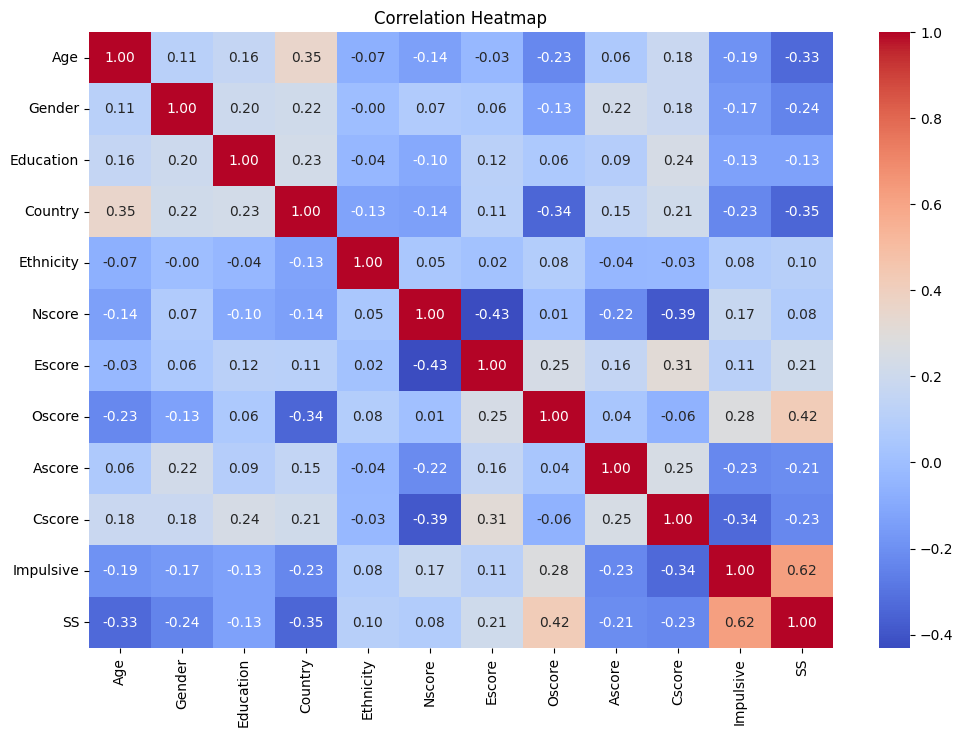

In [64]:
# CORRELATION HEATMAP FOR NUMERICAL COLUMNS
corr = df[numerical_cols].corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')